# Algoritmos no supervisados: Agrupamiento / Clustering

El agrupamiento (*clustering*) es una técnica que nos permite encontrar grupos de similares objetos que están más relacionados entre sí que con objetos de otros grupos. Entre los ejemplos de aplicaciones de agrupación en clústeres orientadas a los negocios se incluyen la agrupación de documentos, música y películas por diferentes temas, o la búsqueda de clientes que compartan intereses similares en función de comportamientos de compra comunes como base para los motores de recomendación.

Existen númerosos algoritmos de clustering: https://scikit-learn.org/stable/modules/clustering.html#clustering
que consideran diversos criterios como la distancia entre puntos, la densidad, distancia en grafos, etc.

Introducimos dos algoritmos básicos:
- K-Means
- Spectral Clustering

## K-Means
El algoritmo K-means reduce la dimensionalidad de las muestras mediante el calculo de centroides. Establece el número de clústers en función del parámetro K.

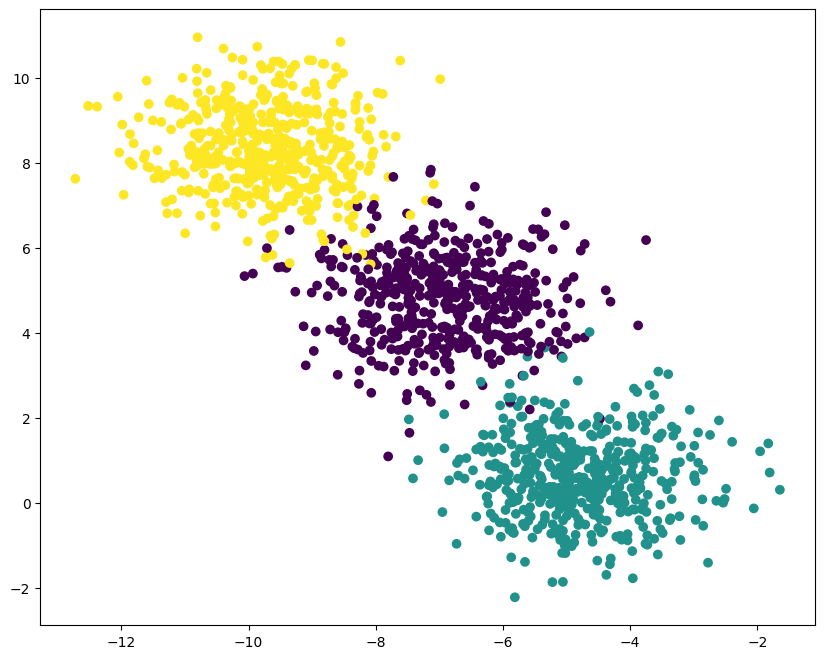

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


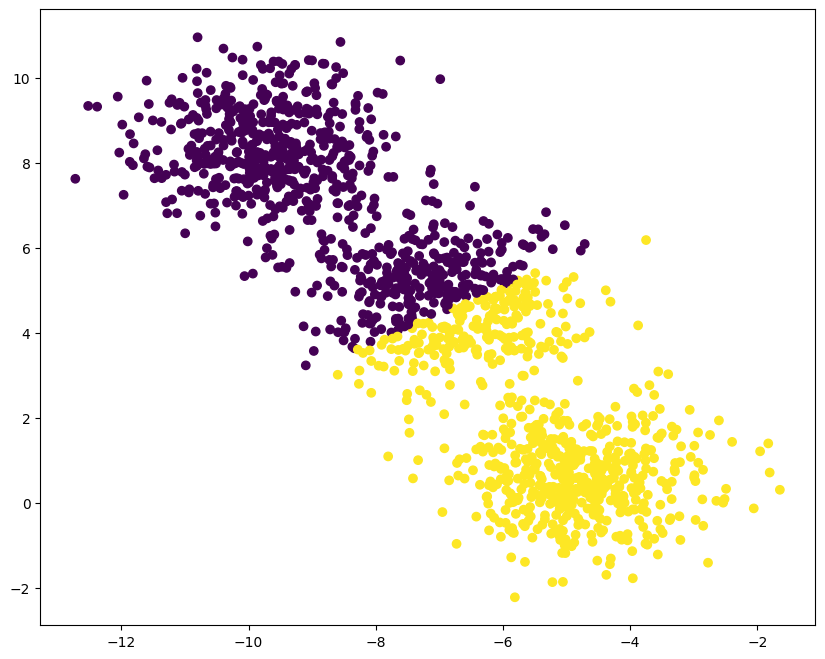

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

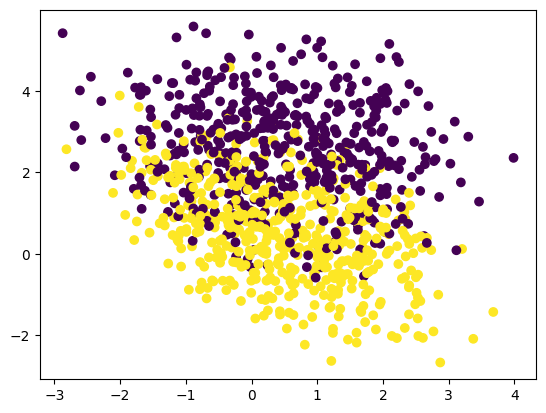

In [9]:
#Anteriormente, generamos estos datos...
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2023, n_clusters_per_class=1)
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

plt.scatter(X[:,0],X[:,1],c=y)

/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


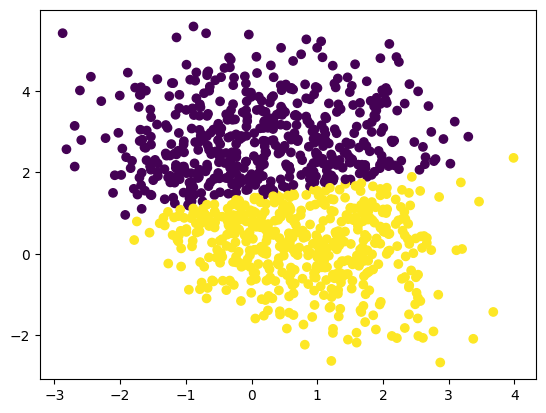

In [10]:
# Y sobre esos datos volvemos a aplicar nuestro k-Means
model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### Número idóneo de grupos

Uno de los principales desafíos del aprendizaje no supervisado es que no conocemos la respuesta definitiva. No tenemos las etiquetas de clase en nuestro conjunto de datos. Por lo tanto, para cuantificar la calidad del clustering, necesitamos utilizar métricas intrínsecas, como la SSE dentro de la agrupación para comparar el rendimiento de diferentes agrupaciones.

$ SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} ||x^{(i)} - \mu^{(j)} ||^2 $

donde $ \mu^{(j)}$ es el centroide del _cluster_ $j$,  y $w^{(i,j)} = 1$ si la muestra $x^{(i)}$ pertenece al clúster $j$ y $w^{(i,j)} = 0$ en caso contrario.

Esta técnica se le conoce como el método del codo o **elbow method**


/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

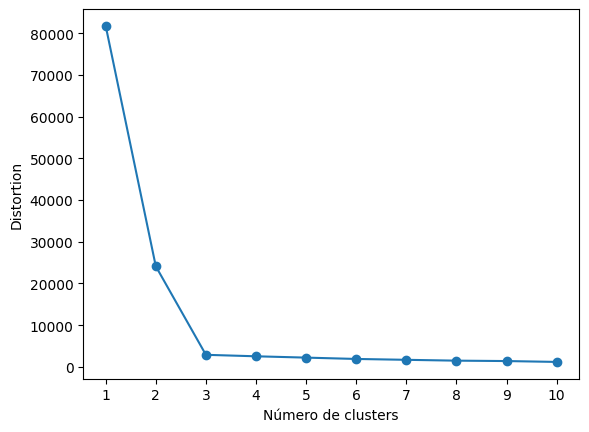

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 2023
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,11))
plt.show()

### Dendrograma

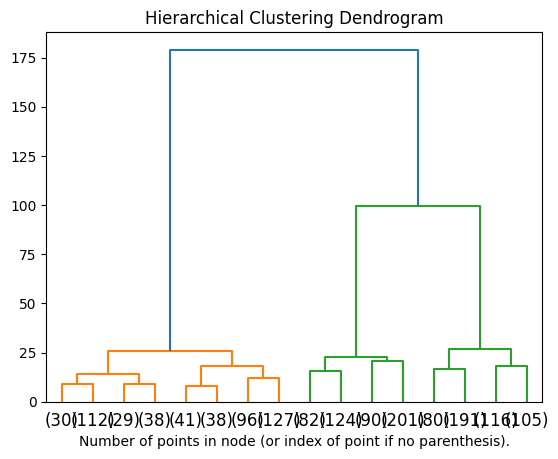

In [6]:
# Dendrogram

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

n_samples = 1500
random_state = 12


X, y = make_blobs(n_samples=n_samples, random_state=random_state)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
#Fuente: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

## Spectral Clustering

La técnica spectral clustering es  útil cuando la estructura de los agrupamientos individuales no es muy convexa o, de manera más general, cuando una medida del centro y la dispersión del agrupamiento no es una descripción adecuada del agrupamiento completo. Por ejemplo, cuando los grupos son círculos anidados en el plano 2D.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html


Como parámetros más importantes tiene:

El número de clusters.
assign_labels: La tècnica que se usa para asignar las etiquetas. Se puede usar k-means o discreti


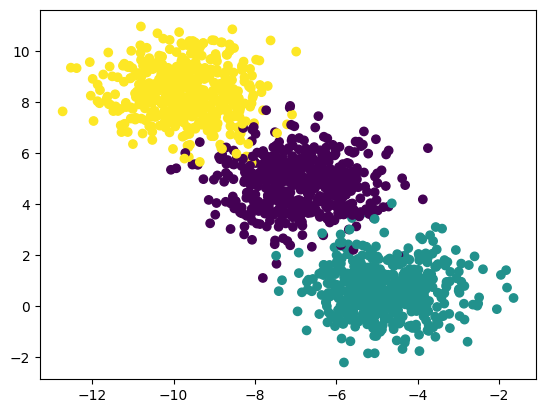

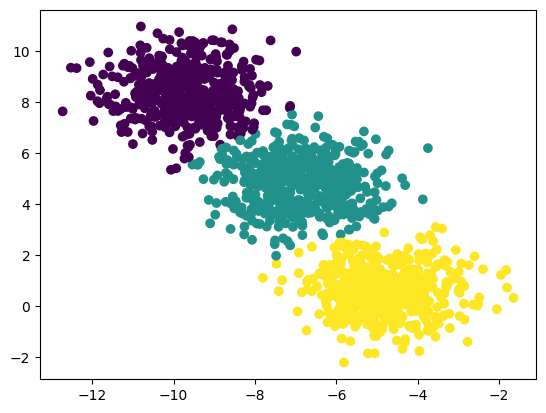

In [11]:
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

sc = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
y_pred = sc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

<span style="color:orange">**Actividad 6.1**</span>

Realización un estudio entre K-Means y Spectral Clustering con el siguiente dataset (*data/Live.csv*,  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand). 
- ¿Qué agrupaciones se realizan sobre los datos? Es decir, proporciona una interpretación de cada agrupación. 
- Carga, **selecciona** y prepara datos
- Evalua la idoneidad de diferentes grupos
- Visualización acorde a la interpretación

In [31]:
pathfile = "data/Live_20210128.csv"